In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, r2_score
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


In [2]:
#The dataset is composed by train + test samples
dataset = pd.read_csv('./completed_dataset.csv', delimiter=',')
df = pd.DataFrame(dataset)
df.shape
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Pre-processing

In [3]:
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
print(df.shape)

(1309, 9)


In [4]:
df.duplicated().sum()
df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age          263
SibSp          0
Parch          0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [5]:
df = df.drop(['Cabin'], axis=1)
df = df.dropna(subset=['Age'])
df = df.dropna(subset=['Fare'])
df = df.dropna(subset=['Embarked'])
df.duplicated().sum()
df.isnull().sum()
df.shape

(1043, 8)

In [6]:
df.duplicated().sum()
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [7]:
# Mapear os valores categóricos para valores numéricos
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})
df['Age'] = df['Age'].astype(int)
mapping = {'C': 0, 'Q': 1, 'S': 2}
df['Embarked'] = df['Embarked'].map(mapping).astype(int)

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,2
1,1,1,0,38,1,0,71.2833,0
2,1,3,0,26,0,0,7.9250,2
3,1,1,0,35,1,0,53.1000,2
4,0,3,1,35,0,0,8.0500,2


In [9]:
## Feature Engineering
#<18 - 0
#18-30 - 1
#30-50 - 2
#+50 - 3
bins = [0, 18, 30, 50, 130]
labels = [0, 1, 2, 3]
df['AgeRange'] = pd.cut(df['Age'], bins=bins, labels=labels)
# Converter as categorias em valores inteiros
df['AgeRange'] = df['AgeRange'].cat.codes

In [10]:
df["AgeRange"].dtype

dtype('int8')

Text(0.5, 1.0, 'Outliers da base não normalizada')

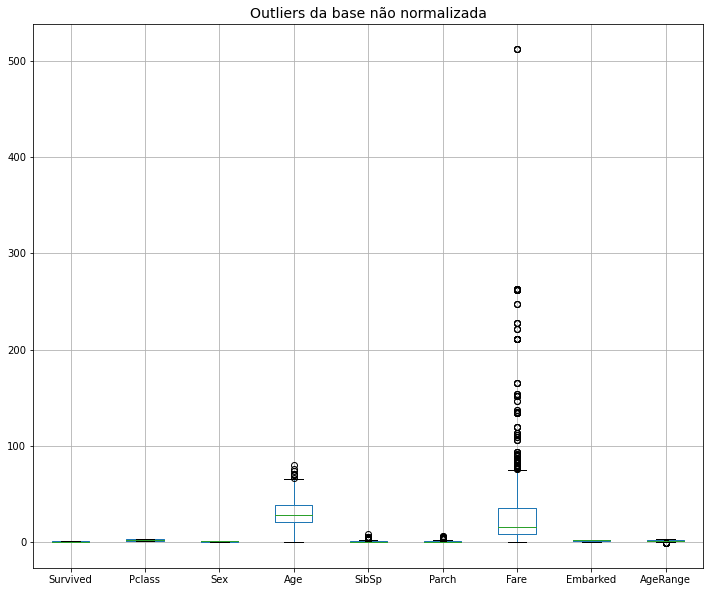

In [11]:

df.boxplot(grid=True, figsize= (12,10))
plt.title('Outliers da base não normalizada', fontsize=14)

In [12]:
scaler = StandardScaler()
df['Fare'] = scaler.fit_transform(df[['Fare']])

Text(0.5, 1.0, 'Outliers da base não normalizada')

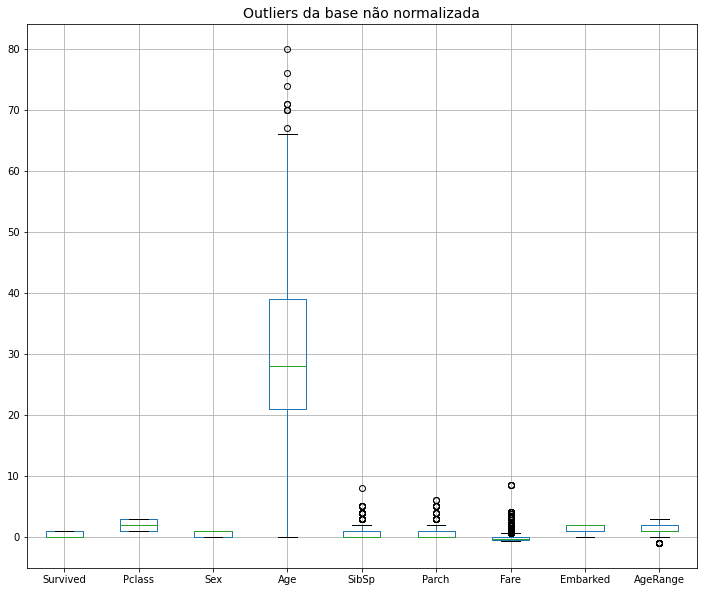

In [13]:
df.boxplot(grid=True, figsize= (12,10))
plt.title('Outliers da base não normalizada', fontsize=14)

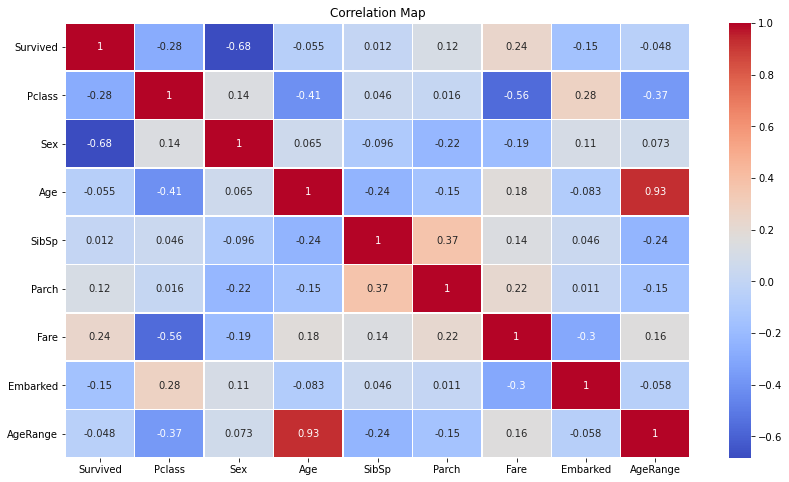

In [14]:
import seaborn as sns
correlation_matrix = df.corr()
color_palette = "YlGnBu"
# Criar o gráfico de correlação (mapa de calor) com a paleta de cores personalizada
plt.figure(figsize=(14, 8),  facecolor='white')
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Map")
plt.show()

#Survival	0 = No, 1 = Yes
#Sex    	0 = Fem, 1 = Male
#pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
#fare	Passenger fare

In [15]:
df = df.drop(['Age', 'Pclass'], axis=1)

In [16]:
df["Survived"].value_counts()

0    628
1    415
Name: Survived, dtype: int64

In [17]:
df.head()

,Survived,Sex,SibSp,Parch,Fare,Embarked,AgeRange
0,0,1,1,0,-0.526730,2,1
1,1,0,1,0,0.622325,0,2
2,1,0,0,0,-0.514617,2,1
3,1,0,1,0,0.296032,2,2
4,0,1,0,0,-0.512374,2,2


### Dividindo a base de dados entre teste e treinamento

In [18]:
x = df.iloc[:, 1:].values
y = df.iloc[:, 0:1].values

## ➡️ Algoritmo 1: Rede Neural Artificial - Perceptron Multilayers

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((834, 6), (834, 1), (209, 6), (209, 1))

In [21]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu', input_dim=6))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [22]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
history = ann.fit(X_train, y_train,  validation_split=0.2, batch_size = 10, epochs = 100, verbose=0)

In [24]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

In [25]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[107  14]
 [ 20  68]]


0.8373205741626795

In [26]:
report = classification_report(y_test, y_pred)
print(report)
# A precisão mede a proporção de previsões positivas
#corretas em relação ao total de previsões positivas feitas pelo modelo.
#não leva em consideração os verdadeiros negativos e falsos negativos

#A acurácia mede a proporção de todas as previsões corretas
#(verdadeiros positivos e verdadeiros negativos)

# Recall (sensibilidade), também chamado de True Positive Rate (Taxa de Verdadeiros Positivos)
#mede a capacidade do modelo de prever classes positivas reais

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       121
           1       0.83      0.77      0.80        88

    accuracy                           0.84       209
   macro avg       0.84      0.83      0.83       209
weighted avg       0.84      0.84      0.84       209



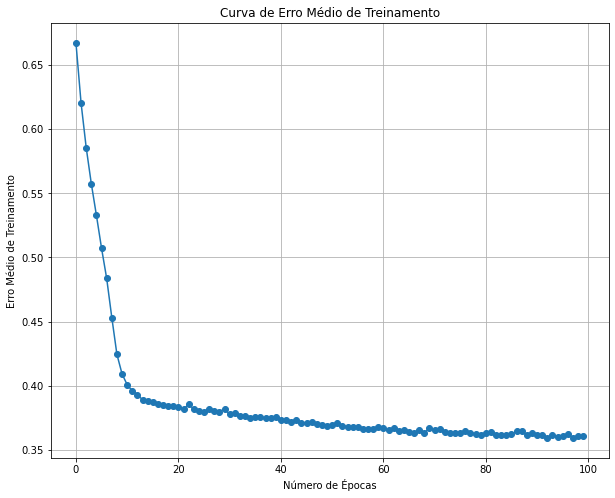

In [27]:
plt.figure(figsize=(10, 8), facecolor='white')
plt.plot(history.history['loss'], marker='o')
plt.xlabel('Número de Épocas')
plt.ylabel('Erro Médio de Treinamento')
plt.title('Curva de Erro Médio de Treinamento')
plt.grid(True)
plt.show()

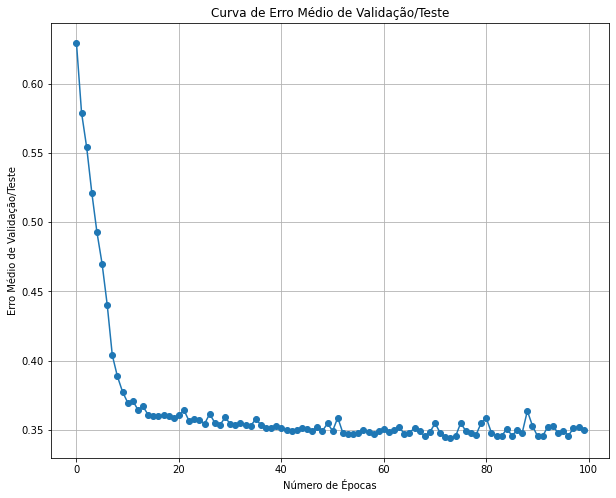

In [28]:
plt.figure(figsize=(10, 8), facecolor='white')
plt.plot(history.history['val_loss'], marker='o')
plt.xlabel('Número de Épocas')
plt.ylabel('Erro Médio de Validação/Teste')
plt.title('Curva de Erro Médio de Validação/Teste')
plt.grid(True)
plt.show()


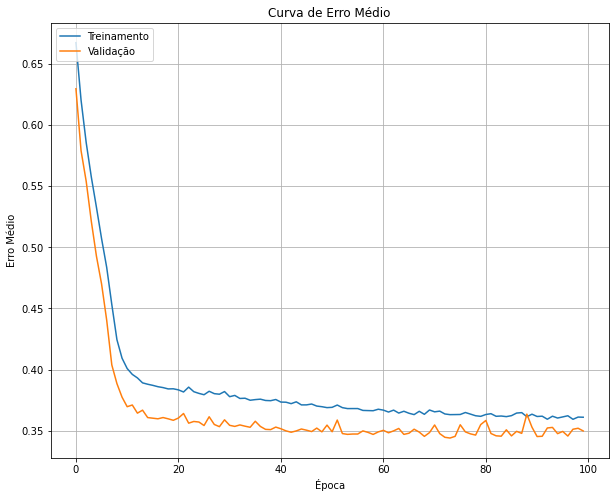

In [29]:
plt.figure(figsize=(10, 8), facecolor='white')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Curva de Erro Médio')
plt.ylabel('Erro Médio')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'], loc='upper left')
plt.grid(True)
plt.show()

## ➡️ Algoritmo 2: Árvore de decisão


In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
clf = DecisionTreeClassifier(random_state = 0)
clf = clf.fit(X_train,y_train)
arvore_prediction = clf.predict(X_test)

In [32]:
cm = confusion_matrix(y_test, arvore_prediction)
cm

array([[107,  14],
       [ 27,  61]], dtype=int64)

In [33]:
import sklearn.metrics as metrics
accuracy_score(y_test, arvore_prediction)
print(metrics.classification_report(y_test,arvore_prediction))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       121
           1       0.81      0.69      0.75        88

    accuracy                           0.80       209
   macro avg       0.81      0.79      0.79       209
weighted avg       0.80      0.80      0.80       209

